###6. Any other insights you find interesting

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
%matplotlib inline

In [111]:
!head Consumer_Complaints.csv

Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
1431865,Consumer loan,Vehicle loan,Managing the loan or lease,,NJ,08736,Web,06/22/2015,06/22/2015,Nissan Motor Acceptance Corporation,In progress,Yes,
1431374,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,WI,54140,Web,06/22/2015,06/22/2015,"RSI Enterprises, Inc.",Closed with explanation,Yes,
1431251,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",,MO,63368,Web,06/22/2015,06/22/2015,Flagstar Bank,In progress,Yes,
1431743,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,WA,98055,Web,06/22/2015,06/22/2015,"P.S.C., Inc",Closed with explanation,Yes,Yes
1432678,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt was paid,TX,75104,Web,06/22/2015,06/22/2015,"ProCollect, Inc",Closed with explanation,Ye

In [112]:
consumer_df = pd.read_csv("Consumer_Complaints.csv")

/Users/margaretblue/ironyard/sandbox/consumer-complaints/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [113]:
consumer_df = pd.read_csv("Consumer_Complaints.csv", header=0, dtype=str)

In [114]:
consumer_df.head(1)

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1431865,Consumer loan,Vehicle loan,Managing the loan or lease,NaN,NJ,08736,Web,06/22/2015,06/22/2015,Nissan Motor Acceptance Corporation,In progress,Yes,NaN


In [115]:
consumer_df = pd.read_csv("Consumer_Complaints.csv", header=0, dtype=str)

In [116]:
consumer_df.head(1)

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1431865,Consumer loan,Vehicle loan,Managing the loan or lease,NaN,NJ,08736,Web,06/22/2015,06/22/2015,Nissan Motor Acceptance Corporation,In progress,Yes,NaN


In [117]:
consumer_df_copy = consumer_df

In [118]:
# change dates to datetimes 
consumer_df_copy['Date received'] = pd.to_datetime(consumer_df_copy['Date received'])
consumer_df_copy['Date sent to company'] = pd.to_datetime(consumer_df_copy['Date sent to company'])

In [120]:
consumer_df_copy.head(1)

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1431865,Consumer loan,Vehicle loan,Managing the loan or lease,NaN,NJ,08736,Web,2015-06-22,2015-06-22,Nissan Motor Acceptance Corporation,In progress,Yes,NaN


In [121]:
type(consumer_df_copy['Date received'])

pandas.core.series.Series

In [122]:
consumer_complaints_by_month = consumer_df_copy

In [123]:
# turn into the index
# then do resample by "M"
# OR OR OR
# groupby   THEN do aggregate
# Pandas groupby tutorial: http://pandas.pydata.org/pandas-docs/stable/groupby.html

In [124]:
consumer_complaints_by_month.dtypes

Complaint ID                    object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
State                           object
ZIP code                        object
Submitted via                   object
Date received           datetime64[ns]
Date sent to company    datetime64[ns]
Company                         object
Company response                object
Timely response?                object
Consumer disputed?              object
dtype: object

In [125]:
consumer_complaints_month_test = consumer_complaints_by_month

In [126]:
date_index = consumer_complaints_month_test.pop('Date received')

In [127]:
consumer_complaints_month_test.index = date_index

In [128]:
consumer_complaints_month_test.head(1)

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
Date received,,,,,,,,,,,,,
2015-06-22,1431865,Consumer loan,Vehicle loan,Managing the loan or lease,NaN,NJ,08736,Web,2015-06-22,Nissan Motor Acceptance Corporation,In progress,Yes,NaN


In [135]:
grouped_date_received = consumer_complaints_month_test.groupby(pd.TimeGrouper("M"))

In [153]:
#grouped_date_received.head(2) # cool! shows you two records PER month

In [150]:
results_complaints_by_month = grouped_date_received.count()['Complaint ID']

In [156]:
grouped_by_product = consumer_complaints_month_test.groupby('Product')

In [158]:
grouped_by_product.count()

,Complaint ID,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
Product,,,,,,,,,,,,
Bank account or service,47166,47166,47162,0,46230,46305,47166,47166,47166,47166,47166,44730
Consumer loan,13771,13771,13769,0,13632,13609,13771,13771,13771,13771,13771,12666
Credit card,51103,0,51103,0,50548,50473,51103,51103,51103,51103,51103,48529
Credit reporting,60006,0,60006,60006,58475,59568,60006,60006,60006,60006,60006,52516
Debt collection,68907,53805,68907,68907,68065,68246,68907,68907,68907,68907,68907,61004
Money transfers,2383,2383,2383,0,2281,2323,2383,2383,2383,2383,2383,2110
Mortgage,150140,150140,150140,0,148819,148477,150140,150140,150140,150140,150140,141705
Other financial service,227,227,227,0,216,223,227,227,227,227,227,183
Payday loan,2655,0,2655,0,2590,2633,2655,2655,2655,2655,2655,2276


In [242]:
consumer_complaints_month_test.head(1)

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
Date received,,,,,,,,,,,,,
2015-06-22,1431865,Consumer loan,Vehicle loan,Managing the loan or lease,NaN,NJ,08736,Web,2015-06-22,Nissan Motor Acceptance Corporation,In progress,Yes,NaN


In [245]:
consumer_complaints_month_test['weekday'] = consumer_complaints_month_test['Date sent to company'].apply(lambda x: x.weekday())

In [248]:
consumer_complaints_month_test.groupby('weekday')

#Objectives:

###1. Number of complaints by month (leave off the current month)

1. Cleaned data, converting dates to datetimes & indexing by Date received
2. Grouped by month of date received
3. Ran a count then displayed only the date received and complaints column

``` results_complaints_by_month = grouped_date_received.count()['Complaint ID']  ```

In [152]:
results_complaints_by_month 

Date received
2011-12-31     2556
2012-01-31     3266
2012-02-29     3507
2012-03-31     6247
2012-04-30     5725
2012-05-31     7627
2012-06-30     7859
2012-07-31     6787
2012-08-31     6880
2012-09-30     5500
2012-10-31     6764
2012-11-30     6129
2012-12-31     6263
2013-01-31     9824
2013-02-28     8330
2013-03-31     8708
2013-04-30     8649
2013-05-31     8158
2013-06-30     8035
2013-07-31     9295
2013-08-31     9571
2013-09-30     9655
2013-10-31     9234
2013-11-30     9309
2013-12-31     9499
2014-01-31    12657
2014-02-28    13054
2014-03-31    13962
2014-04-30    13844
2014-05-31    12151
2014-06-30    12555
2014-07-31    13436
2014-08-31    13151
2014-09-30    12510
2014-10-31    12880
2014-11-30    11276
2014-12-31    11711
2015-01-31    12631
2015-02-28    12711
2015-03-31    14576
2015-04-30    13752
2015-05-31    13498
2015-06-30     5668
Freq: M, Name: Complaint ID, dtype: int64

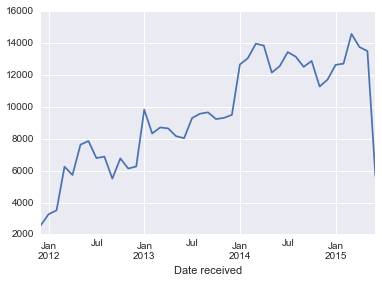

In [162]:
results_complaints_by_month.plot()

###2. Number of complaints by product

In [159]:
grouped_by_product.count()['Complaint ID']

Product
Bank account or service     47166
Consumer loan               13771
Credit card                 51103
Credit reporting            60006
Debt collection             68907
Money transfers              2383
Mortgage                   150140
Other financial service       227
Payday loan                  2655
Prepaid card                  784
Student loan                12258
Name: Complaint ID, dtype: int64

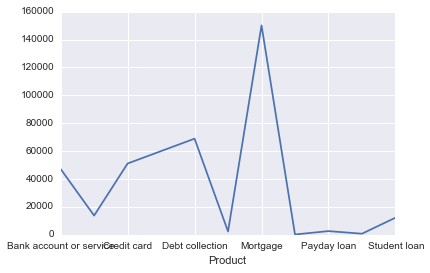

In [161]:
grouped_by_product.count()['Complaint ID'].plot()

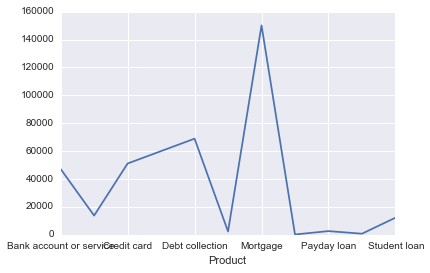

In [160]:
grouped_by_product.count()['Complaint ID'].plot()

###3. Number of complaints by company (top 10 companies only)

In [202]:
grouped_by_company = consumer_complaints_month_test.groupby('Company')

In [203]:
#results_top_company = grouped_by_company.count().sort('Complaint ID', ascending = False)

In [227]:
top_ten_companies = grouped_by_company.count().sort('Complaint ID', ascending = False)[:10]

In [228]:
top_ten_companies['Complaint ID']

Company
Bank of America        47753
Wells Fargo            33781
JPMorgan Chase         26745
Experian               21112
Equifax                20592
Citibank               20024
Ocwen                  17331
TransUnion             16010
Capital One            12378
Nationstar Mortgage    10081
Name: Complaint ID, dtype: int64

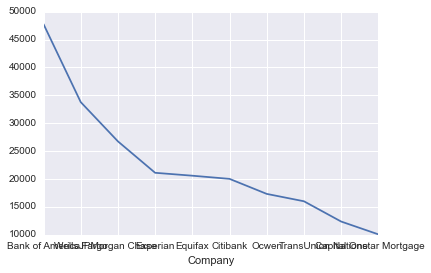

In [229]:
top_ten_companies['Complaint ID'].plot()

###4. Number of complaints by company response

In [233]:
complaints_by_response = consumer_complaints_month_test.groupby('Company response')

In [240]:
complaints_by_response.count()['Complaint ID']

Company response
Closed                               9909
Closed with explanation            289933
Closed with monetary relief         28910
Closed with non-monetary relief     52257
Closed with relief                   5305
Closed without relief               17909
In progress                          3153
Untimely response                    2024
Name: Complaint ID, dtype: int64

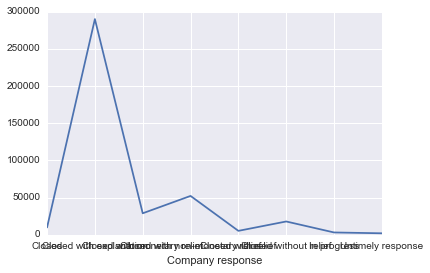

In [241]:
complaints_by_response.count()['Complaint ID'].plot()

###5. μ(Mean) number of complaints by day of week

In [249]:
consumer_complaints_month_test['weekday'] = consumer_complaints_month_test['Date sent to company'].apply(lambda x: x.weekday())

In [250]:
complaints_by_weekday = consumer_complaints_month_test.groupby('weekday')

In [264]:
consumer_complaints_month_test['week'].resample(‘D’, how=’mean’)

SyntaxError: invalid character in identifier (<ipython-input-264-6421eb513e6f>, line 1)